# Import the dataset

In [1]:
import pandas as pd

In [2]:
data_ev = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
print(data_ev.head())

   VIN (1-10)    County     City State  Postal Code  Model Year   Make  \
0  WAUTPBFF4H      King  Seattle    WA      98126.0        2017   AUDI   
1  WAUUPBFF2J  Thurston  Olympia    WA      98502.0        2018   AUDI   
2  5YJSA1E22H  Thurston    Lacey    WA      98516.0        2017  TESLA   
3  1C4JJXP62M  Thurston   Tenino    WA      98589.0        2021   JEEP   
4  5YJ3E1EC9L    Yakima   Yakima    WA      98902.0        2020  TESLA   

      Model                   Electric Vehicle Type  \
0        A3  Plug-in Hybrid Electric Vehicle (PHEV)   
1        A3  Plug-in Hybrid Electric Vehicle (PHEV)   
2   MODEL S          Battery Electric Vehicle (BEV)   
3  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
4   MODEL 3          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range              16   
1             Not eligible due to low battery range              16   
2          

# Clean the data

In [4]:
data_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

In [5]:
data_ev.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [6]:
data_ev = data_ev.dropna()

# EV Adoption Over Time

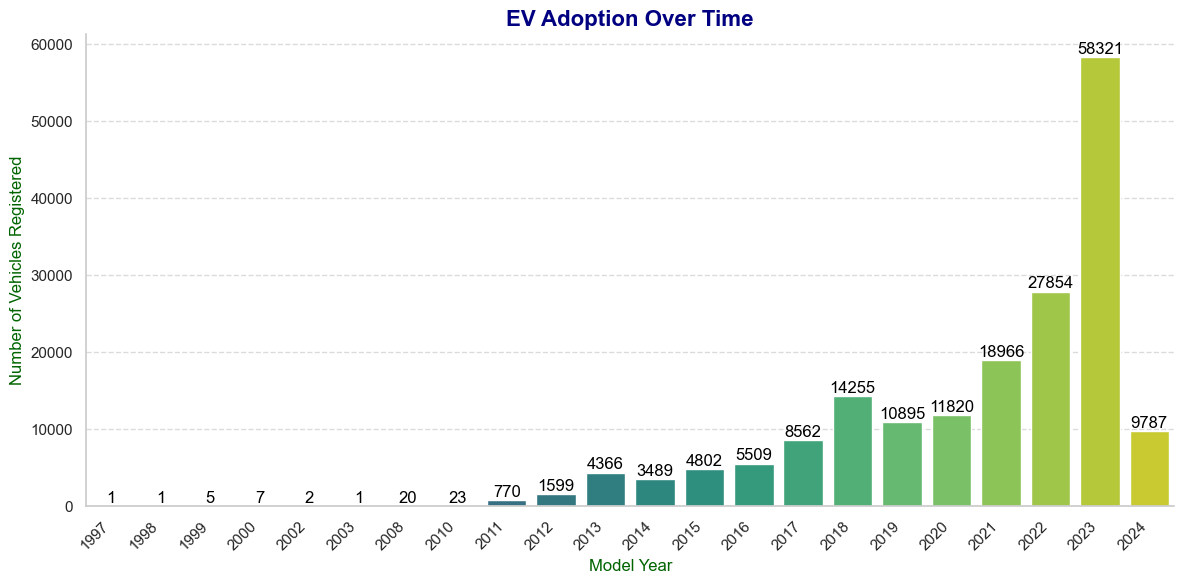

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Calculate EV adoption by year
ev_adoption_by_year = data_ev['Model Year'].value_counts().sort_index()

# Define color palette
colors = sns.color_palette("viridis", len(ev_adoption_by_year))

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette=colors)

# Title and labels
plt.title('EV Adoption Over Time', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Model Year', fontsize=12, color='darkgreen')
plt.ylabel('Number of Vehicles Registered', fontsize=12, color='darkgreen')

# Rotate x-axis labels for better readability
bars.set_xticklabels(bars.get_xticklabels(), rotation=45, ha='right')

# Add data labels
for bar, val in zip(bars.patches, ev_adoption_by_year.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{val}', ha='center', va='bottom', color='black')

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


# Distribution of EVs within the cities of top 5 counties

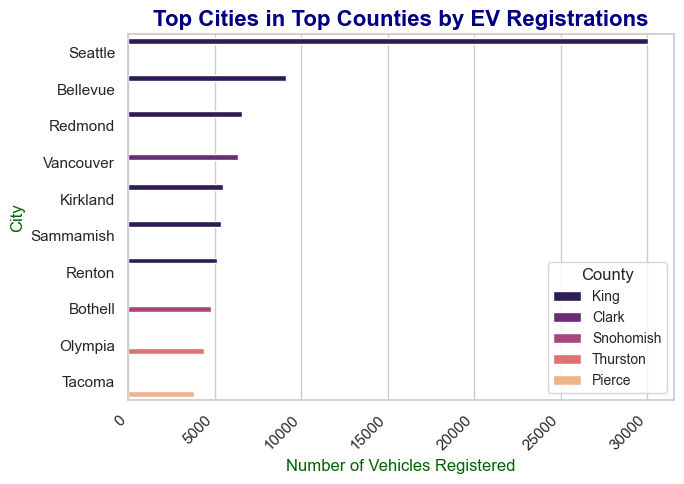

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 counties by EV registrations
top_counties = data_ev['County'].value_counts().head(5).index

# Filter data for top counties
top_counties_data = data_ev[data_ev['County'].isin(top_counties)]

# Group data by county and city to analyze EV distribution
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Select top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

# Plot
plt.figure(figsize=(7, 5))
bars = sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")

# Title and labels
plt.title('Top Cities in Top Counties by EV Registrations', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Number of Vehicles Registered', fontsize=12, color='darkgreen')
plt.ylabel('City', fontsize=12, color='darkgreen')
plt.legend(title='County', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


# Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV)

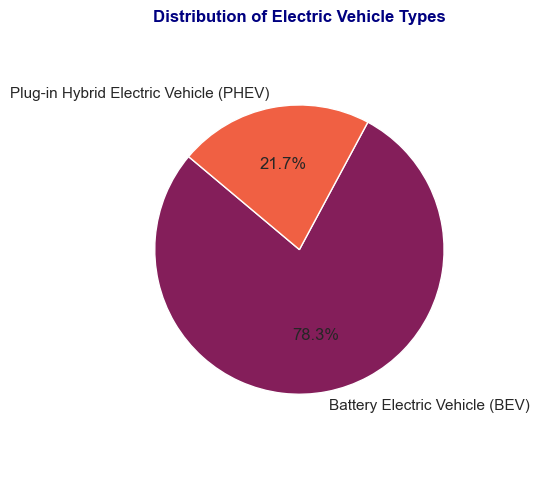

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of electric vehicle types
ev_type_distribution = data_ev['Electric Vehicle Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))  # Adjust the size here
plt.pie(ev_type_distribution, labels=ev_type_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("rocket", len(ev_type_distribution)))
plt.title('Distribution of Electric Vehicle Types', fontsize=12, fontweight='bold', color='navy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


# Manufactures Analysis

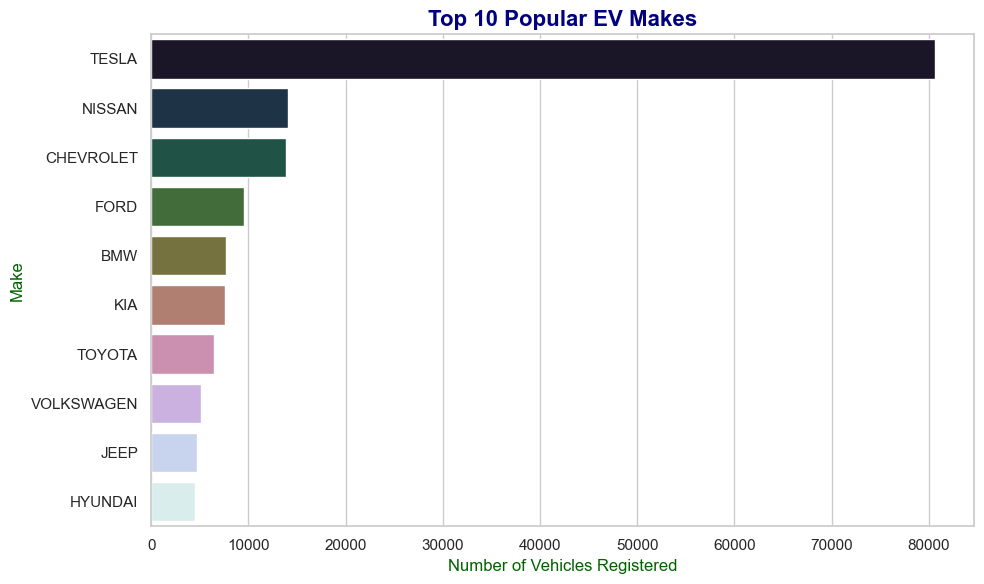

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the popularity of EV manufacturers
ev_make_distribution = data_ev['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

# Plot
plt.figure(figsize=(10, 6))  # Adjust size here
bars = sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")

# Title and labels
plt.title('Top 10 Popular EV Makes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Number of Vehicles Registered', fontsize=12, color='darkgreen')
plt.ylabel('Make', fontsize=12, color='darkgreen')

# Show plot
plt.tight_layout()
plt.show()


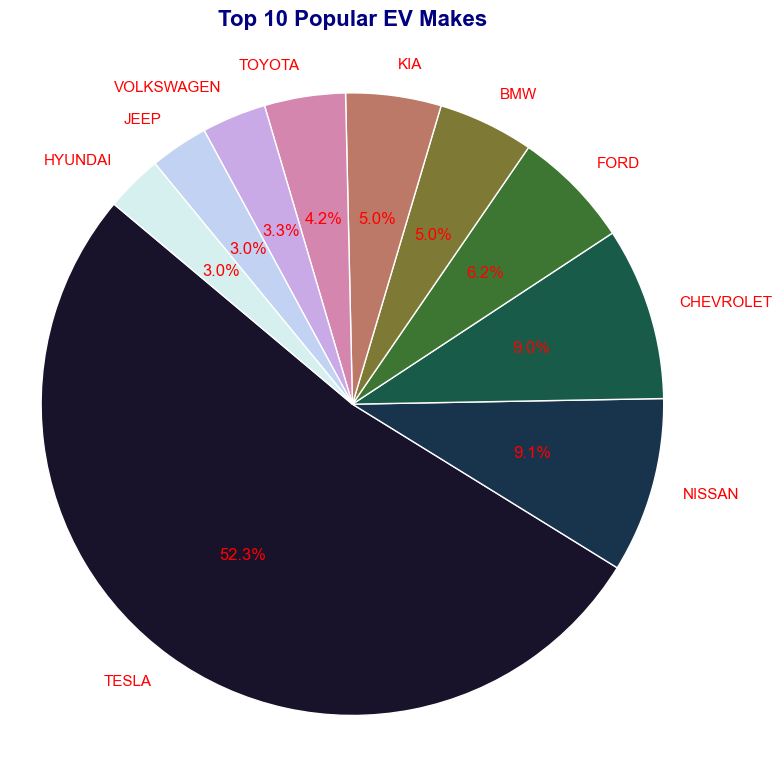

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the popularity of EV manufacturers
ev_make_distribution = data_ev['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(ev_make_distribution, labels=ev_make_distribution.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("cubehelix", len(ev_make_distribution)), textprops={'color': 'red'})  # Set text color to dark green
plt.title('Top 10 Popular EV Makes', fontsize=16, fontweight='bold', color='navy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


# Models Popularity - Top 3 Manufactures

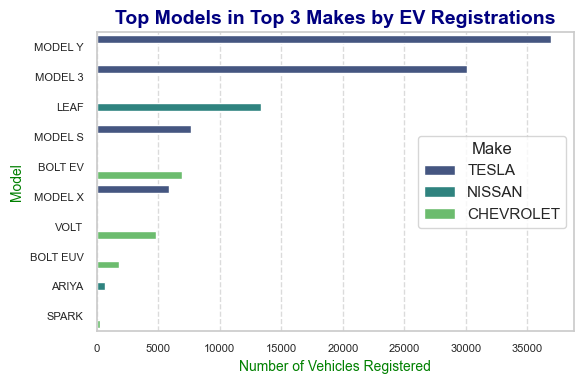

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# Filtering the dataset for these top manufacturers
top_makes_data = data_ev[data_ev['Make'].isin(top_3_makes)]

# Analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Selecting the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

# Smaller-sized bar plot with green-colored labels
plt.figure(figsize=(6, 4))  # Adjust width and height as needed
bars = sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")

# Title and labels with green-colored text
plt.title('Top Models in Top 3 Makes by EV Registrations', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Number of Vehicles Registered', fontsize=10, color='green')
plt.ylabel('Model', fontsize=10, color='green')

# Customize grid and ticks
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=8)

# Legend
plt.legend(title='Make', loc='center right')

# Show plot
plt.tight_layout()
plt.show()


# Analyzing the Distribution of Electric Range

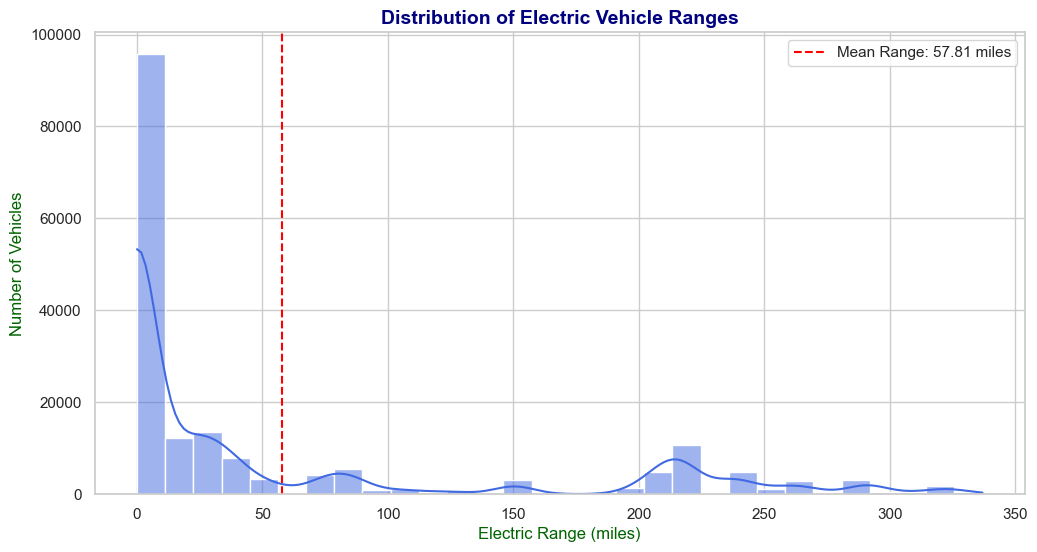

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(data_ev['Electric Range'], bins=30, kde=True, color='royalblue')

# Title and labels
plt.title('Distribution of Electric Vehicle Ranges', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Electric Range (miles)', fontsize=12, color='darkgreen')
plt.ylabel('Number of Vehicles', fontsize=12, color='darkgreen')

# Mean line
plt.axvline(data_ev['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {data_ev["Electric Range"].mean():.2f} miles')

# Legend
plt.legend()

# Show plot
plt.show()


In [61]:
# calculate the number of EVs registered each year
ev_registration_counts = data_ev['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      770
2012     1599
2013     4366
2014     3489
2015     4802
2016     5509
2017     8562
2018    14255
2019    10895
2020    11820
2021    18966
2022    27854
2023    58321
2024     9787
Name: Model Year, dtype: int64

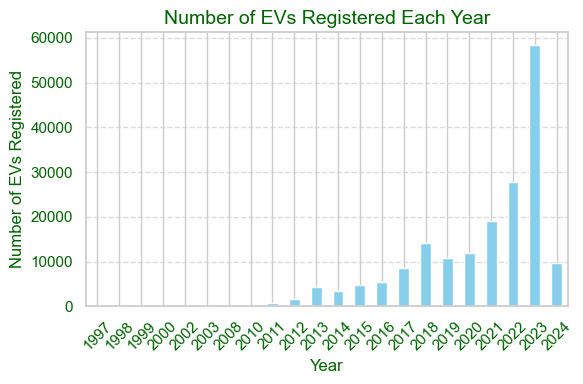

In [65]:
import matplotlib.pyplot as plt
# Calculate the number of EVs registered each year
ev_registration_counts = data_ev['Model Year'].value_counts().sort_index()

# Define colors
bar_color = 'skyblue'
label_color = 'darkgreen'

# Create bar chart
plt.figure(figsize=(6, 4))
ev_registration_counts.plot(kind='bar', color=bar_color)
plt.xlabel('Year', color=label_color, fontsize=12)
plt.ylabel('Number of EVs Registered', color=label_color, fontsize=12)
plt.title('Number of EVs Registered Each Year', color=label_color, fontsize=14)
plt.xticks(color=label_color, rotation=45)
plt.yticks(color=label_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Compound Annual Growth Rate (CAGR)

In [66]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 80897.07358683608, 2025: 123331.81809911264, 2026: 188025.8046578803, 2027: 286655.1694618844, 2028: 437020.79259139416, 2029: 666261.0463845317}


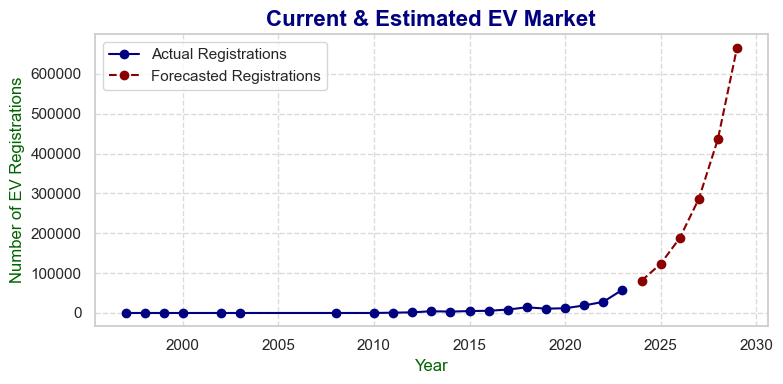

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(8, 4))

# Plot actual registrations
plt.plot(actual_years, actual_values, 'o-', color='navy', label='Actual Registrations')

# Plot forecasted registrations
plt.plot(forecast_years_full, forecasted_values_full, 'o--', color='darkred', label='Forecasted Registrations')

# Title and labels
plt.title('Current & Estimated EV Market', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Year', fontsize=12, color='darkgreen')
plt.ylabel('Number of EV Registrations', fontsize=12, color='darkgreen')
plt.legend()

# Customize grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
